In [1]:
import sys
from pathlib import Path

sys.path.append((Path.cwd() / "../").resolve().as_posix())

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from researchai.layers import Dense
from researchai.activations import ReLU
from researchai.optimizers import SGD
from researchai.commons import Softmax_CategoricalCrossentropy
from researchai.metrics import classification_accuracy
from researchai.datasets import spiral

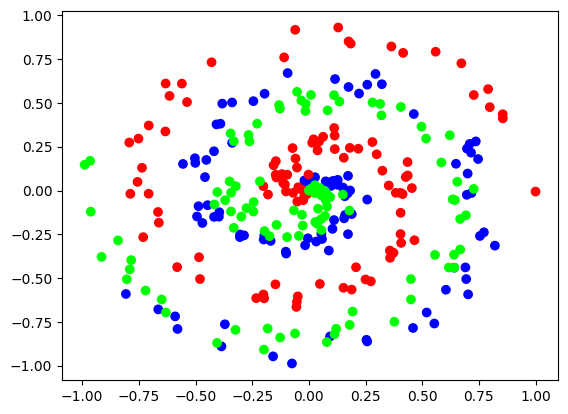

In [3]:
X, y = spiral(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [4]:
dense1 = Dense(2, 64)
activation1 = ReLU()
dense2 = Dense(64, 3)

softmax_cross_entropy = Softmax_CategoricalCrossentropy()
optimizer = SGD(learning_rate=0.85)

losses = []
accuracies = []
dense1_weigths_grads = []
dense1_biases_grads = []
dense2_weigths_grads = []
dense2_biases_grads = []
for epoch in range(10_001):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)

    loss = softmax_cross_entropy.forward(dense2.outputs, y)
    acc = classification_accuracy(softmax_cross_entropy.outputs, y)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.3f}, Acc: {acc:.3f}")

    # Backward pass
    softmax_cross_entropy.backward()
    dense2.backward(softmax_cross_entropy.inputs_grad)
    activation1.backward(dense2.inputs_grad)
    dense1.backward(activation1.inputs_grad)

    # log
    losses.append(loss)
    accuracies.append(acc)
    dense1_weigths_grads.append(dense1.weights_grad)
    dense1_biases_grads.append(dense1.biases_grad)
    dense2_weigths_grads.append(dense2.weights_grad)
    dense2_biases_grads.append(dense2.biases_grad)

    # Update params
    optimizer.step(dense1)
    optimizer.step(dense2)
    

Epoch: 0, Loss: 1.099, Acc: 0.357
Epoch: 100, Loss: 1.081, Acc: 0.413
Epoch: 200, Loss: 1.070, Acc: 0.420
Epoch: 300, Loss: 1.068, Acc: 0.410
Epoch: 400, Loss: 1.067, Acc: 0.413
Epoch: 500, Loss: 1.066, Acc: 0.427
Epoch: 600, Loss: 1.065, Acc: 0.423
Epoch: 700, Loss: 1.064, Acc: 0.417
Epoch: 800, Loss: 1.060, Acc: 0.417
Epoch: 900, Loss: 1.053, Acc: 0.423
Epoch: 1000, Loss: 1.042, Acc: 0.423
Epoch: 1100, Loss: 1.025, Acc: 0.440
Epoch: 1200, Loss: 1.026, Acc: 0.433
Epoch: 1300, Loss: 1.018, Acc: 0.453
Epoch: 1400, Loss: 1.011, Acc: 0.447
Epoch: 1500, Loss: 1.008, Acc: 0.447
Epoch: 1600, Loss: 1.005, Acc: 0.467
Epoch: 1700, Loss: 1.015, Acc: 0.507
Epoch: 1800, Loss: 1.008, Acc: 0.440
Epoch: 1900, Loss: 1.005, Acc: 0.440
Epoch: 2000, Loss: 1.010, Acc: 0.477
Epoch: 2100, Loss: 0.999, Acc: 0.450
Epoch: 2200, Loss: 0.980, Acc: 0.473
Epoch: 2300, Loss: 0.980, Acc: 0.463
Epoch: 2400, Loss: 1.021, Acc: 0.423
Epoch: 2500, Loss: 0.961, Acc: 0.477
Epoch: 2600, Loss: 0.942, Acc: 0.510
Epoch: 2700, 

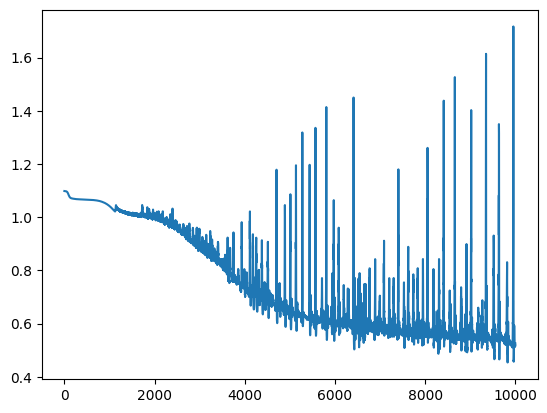

In [5]:
plt.plot(losses)

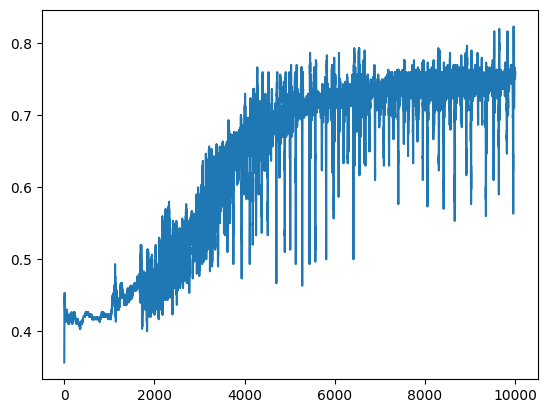

In [6]:
plt.plot(accuracies)

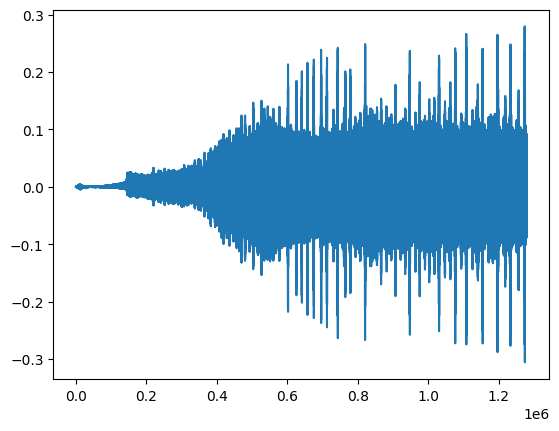

In [7]:
plt.plot(np.array(dense1_weigths_grads).reshape(-1))